In [95]:
import numpy as np
import pandas as pd
import requests as re
import bs4
import matplotlib.pyplot as plt

In [54]:
url = "https://webbook.nist.gov/cgi/cbook.cgi?ID=C71432&Mask=4#Thermo-Phase"

In [55]:
page = re.get(url)


In [58]:
page.text

'\n\n\n\nBenzene\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nsvg4everybody();\n\n\n\n\nJump to content\n\n\n\n\nNational Institute of Standards and\nTechnology\n\nNIST Chemistry\n  WebBook, SRD 69\n\n\n\n\n\nHome\n\n\n\n\n\nSearch\n\n\n\n            Name\n\n\n\n            Formula\n\n\n\n            IUPAC identifier\n\n\n\n            CAS number\n\n\n\n            More options\n\n\n\n\nNIST Data\n\n\nSRD Program\n          \n\n\nScience Data Portal\n          \n\n\nOffice of Data\n            and Informatics\n          \n\n\n\n\nAbout\n\n\n\n          FAQ\n\n\n\n            Credits\n\n\n\n            More documentation\n\n\n\n\n\n\n\nBenzene\n\nFormula: C6H6\nMolecular weight: 78.1118\n\n\nIUPAC Standard InChI:\nInChI=1S/C6H6/c1-2-4-6-5-3-1/h1-6H\n\nCopy\n\n\n\n\n\n\n\n\n\n\nIUPAC Standard InChIKey:\nUHOVQNZJYSORNB-UHFFFAOYSA-N\n\nCopy\n\n\n\n\n\nCAS Registry Number: 71-43-2\nChemical structure: \n\nThis structure is also available as a 2d Mol file\n\n\nor as a computed\n3d 

In [62]:
page = bs4.BeautifulSoup(page.text)

In [16]:
tables = page.findAll("table") #tables is a list of table tagged data

In [17]:
tables[0]

<table aria-label="One dimensional data" class="data"><tr>
<th scope="col">Quantity</th>
<th scope="col">Value</th>
<th scope="col">Units</th>
<th scope="col">Method</th>
<th scope="col">Reference</th>
<th scope="col">Comment</th>
</tr>
<tr class="cal"><td style="text-align: left;">T<sub>boil</sub></td><td class="right-nowrap">353.3 ± 0.1</td><td style="text-align: right;">K</td><td style="text-align: center;"><a href="/chemistry/site-cal.html#AVG">AVG</a></td><td style="text-align: left;">N/A</td><td style="text-align: left;">Average of 147 out of 183 values; <a href="/cgi/cbook.cgi?ID=C71432&amp;Type=TBOIL">Individual data points</a></td></tr>
<tr>
<th scope="col">Quantity</th>
<th scope="col">Value</th>
<th scope="col">Units</th>
<th scope="col">Method</th>
<th scope="col">Reference</th>
<th scope="col">Comment</th>
</tr>
<tr class="cal"><td style="text-align: left;">T<sub>fus</sub></td><td class="right-nowrap">278.64 ± 0.08</td><td style="text-align: right;">K</td><td style="text-a

In [19]:
tables[0]["aria-label"], tables[0]["class"]

('One dimensional data', ['data'])

In [20]:
for table in tables:
    arialabel = table["aria-label"]
    if arialabel == 'Antoine Equation Parameters':
        break


In [21]:
table["aria-label"]

'Antoine Equation Parameters'

In [22]:
rows = table.findAll("tr")

In [25]:
rows[1]

<tr class="exp"><td class="right-nowrap">333.4 - 373.5</td><td class="right-nowrap">4.72583</td><td class="right-nowrap">1660.652</td><td class="right-nowrap">-1.461</td><td style="text-align: left;"><a href="#ref-20">Eon, Pommier, et al., 1971</a></td><td style="text-align: left;">Coefficents calculated by NIST from author's data.</td></tr>

In [26]:
#Let's get data from row[1]
cells = rows[1].findAll("td")

In [27]:
cells[0], cells[1], cells[2], cells[3]

(<td class="right-nowrap">333.4 - 373.5</td>,
 <td class="right-nowrap">4.72583</td>,
 <td class="right-nowrap">1660.652</td>,
 <td class="right-nowrap">-1.461</td>)

In [28]:
cells[0].text

'333.4 - 373.5'

In [29]:
cells[1].text

'4.72583'

In [30]:
cells[0].text.split('-')

['333.4 ', ' 373.5']

In [31]:
Tmin = []
Tmax = []
A = []
B = []
C = []

In [32]:
page = re.get(url)

In [35]:
page = bs4.BeautifulSoup(page.text)

In [36]:
tables = page.findAll("table")

In [37]:
for table in tables:
    arialabel = table["aria-label"]
    if arialabel == 'Antoine Equation Parameters':
        break


In [38]:
table["aria-label"]

'Antoine Equation Parameters'

In [39]:
rows = table.findAll("tr")

In [40]:
cells = rows[1].findAll("td")

In [117]:
Tmin,Tmax,A,B,C = [],[],[],[],[]
for irow in range (len(rows)):
    if irow > 0:
        cells = rows[irow].findAll("td")
        tmin,tmax = cells[0].text.split('-')
        a = cells[1].text
        b = cells[2].text
        c = cells[3].text
        Tmin.append(float(tmin))
        Tmax.append(float(tmax))
        A.append(float(a))
        B.append(float(b))
        C.append(float(c))

In [119]:
Tmin

[333.4, 297.9, 421.56, 287.7]

In [120]:
Tmax

[373.5, 318.0, 554.8, 354.07]

In [121]:
A

[4.72583, 0.14591, 4.60362, 4.01814]

In [122]:
B

[1660.652, 39.165, 1701.073, 1203.835]

In [123]:
C

[-1.461, -261.236, 20.806, -53.226]

In [125]:
dict={'Tmin':Tmin,'Tmax':Tmax,'A':A,'B':B,'C':C}

In [129]:
df = pd.DataFrame(dict)

In [142]:
df.to_excel('Benzene.xlsx')

In [65]:
page = re.get(url)
page = bs4.BeautifulSoup(page.text)

In [71]:
h1s = page.findAll("h1")
for h1 in h1s:
    try:
        if h1["id"] == "Top":
            break
    except KeyError:
        continue
h1.text

'Benzene'

In [75]:
page.find("title").text

'Benzene'

In [76]:
def get_antoine_from_nist(CAS):
    url = f"https://webbook.nist.gov/cgi/cbook.cgi?ID=C{CAS}&Mask=4#Thermo-Phase"
    page = re.get(url)
    page = bs4.BeautifulSoup(page.text)
    name = page.find("title").text
    tables = page.findAll("table")
    for table in tables:
        aria_label = table["aria-label"]
        if aria_label == "Antoine Equation Parameters":
            break
    rows = table.findAll("tr")
    Tmin, Tmax, A, B, C = [], [], [], [], []
    for irow in range(len(rows)):
        if irow > 0:
            cells = rows[irow].findAll("td")
            tmin, tmax = cells[0].text.split("-")
            a = cells[1].text
            b = cells[2].text
            c = cells[3].text
            Tmin.append(float(tmin))
            Tmax.append(float(tmax))
            A.append(float(a))
            B.append(float(b))
            C.append(float(c))
    df_antoine = pd.DataFrame({
        "Tmin":Tmin,
        "Tmax":Tmax,
        "A":A,
        "B":B,
        "C":C
    })            
    
    return name, df_antoine

In [80]:
name, df = get_antoine_from_nist(108883)
name

'Toluene'

In [89]:
df

,Tmin,Tmax,A,B,C
0,273.13,297.89,4.23679,1426.448,-45.957
1,303.00,343.00,4.08245,1346.382,-53.508
2,420.00,580.00,4.54436,1738.123,0.394
3,308.52,384.66,4.07827,1343.943,-53.773
4,273.00,323.00,4.14157,1377.578,-50.507


In [90]:
import scipy.optimize as scopt

In [100]:
def curve(T, *params):
    [C1, C2, C3, C4, C5] = params
    lnPsat = C1 + C2/T + C3*np.log(T) + C4*T**C5
    return np.exp(lnPsat)

def residuals(params, Tdata, Pdata):
    Pcalc = []
    for T in Tdata:
        Pcalc.append(curve(T, *params))
    Pcalc = np.array(Pcalc)
    Pdata = np.array(Pdata)
    errors = np.log(Pcalc) - np.log(Pdata)
    return errors

def fit_extended_antoine(df, boolplot = False):
    Pdata = []
    Tdata = []
    for i in range(len(df)):
        row = df.iloc[i]
        Tmin = row["Tmin"]
        Tmax = row["Tmax"]
        A = row["A"]
        B = row["B"]
        C = row["C"]
        for T in np.linspace(Tmin, Tmax, 10):
            ln10Psat = A - B/(T+C)
            Psat = 10**ln10Psat
            Psat = Psat*1e5
            Tdata.append(T)
            Pdata.append(Psat)
    plsq = scopt.least_squares(residuals, [0,0,0,0,0], args=(Tdata, Pdata,))
    parameters = plsq.x
    Pdata = np.array(Pdata)
    if boolplot:
        plt.plot(Tdata, np.log(Pdata), 'ro')
        Tfit = np.linspace(min(Tdata), max(Tdata), 1000)
        Pfit = curve(Tfit, *parameters)
        plt.plot(Tfit, np.log(Pfit), 'b')
    return parameters


array([ 8.73182755e+01, -6.31735550e+02, -8.30895590e+00, -1.79793764e+03,
       -7.20626381e-01])

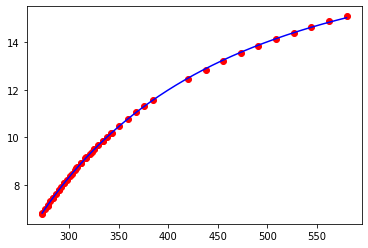

In [101]:
fit_extended_antoine(df, boolplot=True)

In [102]:
def get_and_fit_extended_antoine(CAS):
    name, df = get_antoine_from_nist(CAS)
    parameters = fit_extended_antoine(df)
    return name, parameters

In [103]:
get_and_fit_extended_antoine(108883)

('Toluene',
 array([ 8.73182755e+01, -6.31735550e+02, -8.30895590e+00, -1.79793764e+03,
        -7.20626381e-01]))